Aquí tienes una versión más creativa, amigable y con emojis para el caso que vas a resolver en Python. Esto hará que sea más atractivo para compartir en tu GitHub:

---

## **📜 El Juicio de los Jueces de Hamilton ⚖️**  

En el condado de Hamilton, los jueces se enfrentan a una misión titánica: llevar miles de casos cada año. 📂👨‍⚖️👩‍⚖️ Aunque la mayoría de los casos concluyen con una sentencia definitiva, hay ocasiones en que se presentan apelaciones. 📑💥 Algunas de estas apelaciones logran cambiar la sentencia inicial.  

Durante tres años, **Kristen DelGuzzi**, periodista de *The Cincinnati Enquirer*, llevó a cabo una investigación para descubrir cómo desempeñaron su labor 38 jueces en los tribunales de primera instancia, relaciones domésticas y tribunales municipales. 🕵️‍♀️ El estudio recopiló datos de **182,908 casos**. Sin embargo, dos jueces (Dinkelacker y Hogan) no estuvieron activos durante los tres años completos. 🕒  

El objetivo es evaluar el desempeño de los jueces, ya que las apelaciones suelen estar relacionadas con errores cometidos en la sentencia inicial. 🎯 ¿Qué jueces hacen un trabajo impecable? ¿Quién necesita mejorar?  

Tu misión es ayudar en este análisis de datos usando Python 🐍 y tus conocimientos de probabilidad 📊. Los resultados permitirán clasificar a los jueces y analizar las posibilidades de apelación y revocación en los distintos tribunales.  

---

### **🏆 Objetivos del análisis**  

1. **📈 Probabilidades generales**:  
   - Calcular la probabilidad de que un caso sea **apelado** y **revocado** en los distintos tribunales.  
2. **⚖️ Probabilidades individuales por juez**:  
   - Determinar la probabilidad de que un caso sea apelado para cada juez.  
   - Determinar la probabilidad de que un caso sea revocado para cada juez.  
3. **🔄 Probabilidad condicional**:  
   - Calcular la probabilidad de **revocación** dado que un caso fue apelado, para cada juez.  
4. **📋 Clasificación de jueces**:  
   - Clasificar a los jueces de mejor a peor en cada tribunal. Explica los criterios usados para realizar la clasificación.  

---

### **🚀 Contexto adicional**  

Este análisis será el centro de un informe administrativo que evalúe objetivamente el desempeño de los jueces. Con un toque de Python 🐍 y un poco de probabilidad 🎲, estás a punto de descubrir quiénes son los héroes de la justicia en Hamilton ⚖️✨.


In [962]:
from io import StringIO


In [963]:
import pandas as pd 

tribunalprimerainstancia = StringIO("""Juez,CasosDespachados,CasosApelados,CasosRevocados
Fred Cartolano, 3037, 137, 12
Thomas Crush, 3372, 119, 10
Patrick Dinkelacker, 1258, 44,8
Timothy Hogan, 1954, 60 ,7
Robert Kraft, 3138 ,127, 7
William Mathews, 2264 ,91, 18
William Morrissey ,3032, 121, 22
Norbert Nadel, 2959, 131, 20
Arthur Ney Jr., 3219 ,125, 14
Richard Niehaus ,3353 ,137, 16
Thomas Nurre, 3000 ,121, 6
John O’Connor ,2969 ,129,12
Robert Ruehlman ,3205 ,145,18
J. Howard Sundermann ,955 ,60 ,10
Ann Marie Tracey ,3141, 127 ,13
Ralph Winkler, 3089, 88 ,6""")

tribunalprimerainstancia = pd.read_csv(tribunalprimerainstancia)

tribunalMunicipal = StringIO("""Juez,CasosDespachados,CasosApelados,CasosRevocados
MikeAllen,6149,43,4
NadineAllen,7812,34,6
TimothyBlack,7954,41,6
DavidDavis,7736,43,5
LeslieIsaiahGaines,5282,35,13
KarlaGrady,5253,6,0
DeidraHair,2532,5,0
DennisHelmick,7900,29,5
Timothy Hogan,2308,13,2
JamesPatrickKenney,2798,6,1
JosephLuebbers,4698,25,8
WilliamMallory,8277,38,9
MelbaMarsh,8219,34,7
BethMattingly,2971,13,1
AlbertMestemaker,4975,28,9
MarkPainter,2239,7,3
JackRosen,7790,41,13
MarkSchweikert,5403,33,6
DavidStockdale,5371,22,4
JohnA.West,2797,4,2""")

tribunalMunicipal = pd.read_csv(tribunalMunicipal)

tribunalRelacionesDomesticas = StringIO("""Juez,CasosDespachados,CasosApelados,CasosRevocados
Penelope Cunningham ,2729 ,7 ,1
Patrick Dinkelacker, 6001, 19,4
Deborah Gaines ,8799 ,48 ,9
Ronald Panioto ,12970, 32 ,3""")

tribunalRelacionesDomesticas = pd.read_csv(tribunalRelacionesDomesticas)



In [964]:
tribunalprimerainstancia

,Juez,CasosDespachados,CasosApelados,CasosRevocados
0,Fred Cartolano,3037,137,12
1,Thomas Crush,3372,119,10
2,Patrick Dinkelacker,1258,44,8
3,Timothy Hogan,1954,60,7
4,Robert Kraft,3138,127,7
5,William Mathews,2264,91,18
6,William Morrissey,3032,121,22
7,Norbert Nadel,2959,131,20
8,Arthur Ney Jr.,3219,125,14
9,Richard Niehaus,3353,137,16


In [965]:
def total_juicios(tribunal,nombre):
    tribunal = tribunal.loc[:,['CasosDespachados','CasosApelados','CasosRevocados']].apply(lambda x: x.sum(), axis=0).to_frame(name = f"Total{nombre}").T
    
    return tribunal

In [966]:
total_RelacionesDomesticas = total_juicios(tribunalRelacionesDomesticas,"RelacionesDomesticas")
total_Municipal = total_juicios(tribunalMunicipal,"Municipal")
total_Primerainstancia = total_juicios(tribunalprimerainstancia,"Primerainstancia")

tabla_total = pd.concat([total_Primerainstancia,total_Municipal,total_RelacionesDomesticas],axis=0)

tabla_total


,CasosDespachados,CasosApelados,CasosRevocados
TotalPrimerainstancia,43945,1762,199
TotalMunicipal,108464,500,104
TotalRelacionesDomesticas,30499,106,17


# ¿Cuàl es la probabilidad de casos revocados en cada tribunal?

La probabilidad para responder esta pregunta serà la siguiente:

$ Total de casos despachados : D$

$ Total de casos revocados: R$

$ Probabilidad\ de\ revocados : P(R) = R/D $

In [967]:
# Tribunal de Primera Instancia
pR_PI = round(tabla_total.loc["TotalPrimerainstancia","CasosRevocados"] / tabla_total.loc["TotalPrimerainstancia","CasosDespachados"],4)
pR_PI

# Tribunal Municipal
pR_TM = round(tabla_total.loc["TotalMunicipal","CasosRevocados"] / tabla_total.loc["TotalMunicipal","CasosDespachados"],4)
pR_TM

# Tribunal de Relaciones Domesticas

pR_RD = round(tabla_total.loc["TotalRelacionesDomesticas","CasosRevocados"] / tabla_total.loc["TotalRelacionesDomesticas","CasosDespachados"],4)
pR_RD

print(f"La probabilidad de CasosRevocados en el Tribunal de Primera Instancia es de {pR_PI}")
print(f"La probabilidad de CasosRevocados en el Tribunal Municipal es de {pR_TM}")
print(f"La probabilidad de CasosRevocados en el Tribunal de Relaciones Domesticas es de {pR_RD}")

La probabilidad de CasosRevocados en el Tribunal de Primera Instancia es de 0.0045
La probabilidad de CasosRevocados en el Tribunal Municipal es de 0.001
La probabilidad de CasosRevocados en el Tribunal de Relaciones Domesticas es de 0.0006


# ¿Cuàl es la probabilidad de casos apelados en cada tribunal?

La probabilidad para responder esta pregunta serà la siguiente:

$ Total de casos despachados : D$

$ Total de casos apeladops: A$

$ Probabilidad\ de\ apelados : P(A) = A/D $

In [968]:
# Tribunal de Primera Instancia
pA_PI = round(tabla_total.loc["TotalPrimerainstancia","CasosApelados"] / tabla_total.loc["TotalPrimerainstancia","CasosDespachados"],4)
pA_PI

# Tribunal Municipal
pA_TM = round(tabla_total.loc["TotalMunicipal","CasosApelados"] / tabla_total.loc["TotalMunicipal","CasosDespachados"],4)
pA_TM

# Tribunal de Relaciones Domesticascasos apelados

pA_RD = round(tabla_total.loc["TotalRelacionesDomesticas","CasosApelados"] / tabla_total.loc["TotalRelacionesDomesticas","CasosDespachados"],4)
pA_RD

print(f"La probabilidad de casos apelados en el Tribunal de Primera Instancia es de {pA_PI}")
print(f"La probabilidad de casos apelados en el Tribunal Municipal es de {pA_TM}")
print(f"La probabilidad de casos apelados en el Tribunal de Relaciones Domesticas es de {pA_RD}")

La probabilidad de casos apelados en el Tribunal de Primera Instancia es de 0.0401
La probabilidad de casos apelados en el Tribunal Municipal es de 0.0046
La probabilidad de casos apelados en el Tribunal de Relaciones Domesticas es de 0.0035


# ¿Quiènes son los jueces que màs apelan y revocan?

In [969]:
# Vamos a empezar creando las funciones de probabilidades
# Total de casos : Casos despecahados
# Probabilidad de que un caso sea apelado : Casos apelados / Casos despechados
# Probabilidad de que un caso sea revocado : Casos revocados / Casos despechados
def probabilidad_individual(tribunal):
    
    tabla_probabilidadesIndividuales = tribunal.loc[:,["CasosApelados","CasosRevocados"]].apply(lambda x: x/tribunal["CasosDespachados"])
    tabla_probabilidadesIndividuales.rename(tribunal["Juez"].to_dict(),inplace=True)
    
    
    return tabla_probabilidadesIndividuales

<Axes: >

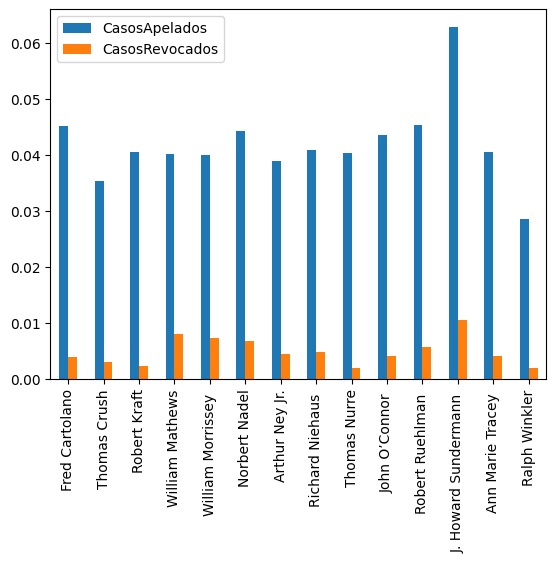

In [1013]:
# Tribunal de Primera Instancia
probabilidad_individual(tribunalprimerainstancia).plot.bar()

In [971]:
# Tribunal Municipal

probabilidad_individual(tribunalMunicipal)

,CasosApelados,CasosRevocados
MikeAllen,0.006993,0.000651
NadineAllen,0.004352,0.000768
TimothyBlack,0.005155,0.000754
DavidDavis,0.005558,0.000646
LeslieIsaiahGaines,0.006626,0.002461
KarlaGrady,0.001142,0.000000
DeidraHair,0.001975,0.000000
DennisHelmick,0.003671,0.000633
Timothy Hogan,0.005633,0.000867
JamesPatrickKenney,0.002144,0.000357


In [972]:
# Tribunal de Relaciones Domesticas

probabilidad_individual(tribunalRelacionesDomesticas)

,CasosApelados,CasosRevocados
Penelope Cunningham,0.002565,0.000366
Patrick Dinkelacker,0.003166,0.000667
Deborah Gaines,0.005455,0.001023
Ronald Panioto,0.002467,0.000231


# ¿Cuàl es la probabilidad de un juez revoque luego de una apelaciòn?

$ Probabilidad condicional: P(R|A) = P(R)/P(A) $

In [973]:
def probabilidad_condicional(tribunal,tabla_probabilidades_individuales):

    tabla_probabilidadesCondicionales = tabla_probabilidades_individuales["CasosRevocados"] / tabla_probabilidades_individuales["CasosApelados"]
    
    return tabla_probabilidadesCondicionales.to_frame(name = "Probabilidad de que un caso sea revocado dado que fue apelado")

In [974]:
# Tribunal de Primera Instancia

probabilidad_condicional(tribunalprimerainstancia,probabilidad_individual(tribunalprimerainstancia)).sort_values(by="Probabilidad de que un caso sea revocado dado que fue apelado",ascending=False)

,Probabilidad de que un caso sea revocado dado que fue apelado
William Mathews,0.197802
Patrick Dinkelacker,0.181818
William Morrissey,0.181818
J. Howard Sundermann,0.166667
Norbert Nadel,0.152672
Robert Ruehlman,0.124138
Richard Niehaus,0.116788
Timothy Hogan,0.116667
Arthur Ney Jr.,0.112000
Ann Marie Tracey,0.102362


In [975]:
# Tribunal Municipal

probabilidad_condicional(tribunalMunicipal,probabilidad_individual(tribunalMunicipal)).sort_values(by="Probabilidad de que un caso sea revocado dado que fue apelado",ascending=False)

,Probabilidad de que un caso sea revocado dado que fue apelado
JohnA.West,0.500000
MarkPainter,0.428571
LeslieIsaiahGaines,0.371429
AlbertMestemaker,0.321429
JosephLuebbers,0.320000
JackRosen,0.317073
WilliamMallory,0.236842
MelbaMarsh,0.205882
MarkSchweikert,0.181818
DavidStockdale,0.181818


In [976]:
# Tribunal de Relaciones Domesticas

probabilidad_condicional(tribunalRelacionesDomesticas,probabilidad_individual(tribunalRelacionesDomesticas)).sort_values(by="Probabilidad de que un caso sea revocado dado que fue apelado",ascending=False)

,Probabilidad de que un caso sea revocado dado que fue apelado
Patrick Dinkelacker,0.210526
Deborah Gaines,0.187500
Penelope Cunningham,0.142857
Ronald Panioto,0.093750


# Clasificaremos los jueces de los mejores a los peores

##  Casos particulares Patrick Dinkelacker y Timothy Hogan revisaremos el caso de ambos 

In [977]:
# Dado que Patrick Dinkelacker  y Timoty Hogan, estuvieron en diferentes tribunales

# Vamos a investigar por què 

tribunalprimerainstancia.query("Juez == 'Patrick Dinkelacker'")
tribunalRelacionesDomesticas.query("Juez == 'Patrick Dinkelacker'")
tribunalprimerainstancia.query("Juez == 'Timothy Hogan'")
tribunalMunicipal.query("Juez == 'Timothy Hogan'")

tabla_invest = pd.concat([tribunalprimerainstancia.query("Juez == 'Patrick Dinkelacker'"), tribunalRelacionesDomesticas.query("Juez == 'Patrick Dinkelacker'"), tribunalprimerainstancia.query("Juez == 'Timothy Hogan'"), tribunalMunicipal.query("Juez == 'Timothy Hogan'")])

tabla_invest

,Juez,CasosDespachados,CasosApelados,CasosRevocados
2,Patrick Dinkelacker,1258,44,8
1,Patrick Dinkelacker,6001,19,4
3,Timothy Hogan,1954,60,7
8,Timothy Hogan,2308,13,2


In [978]:


# Vamos a sumar los casos despachados de Patrick Dinkelacker

total_Patrick = tabla_invest.loc[:,["CasosDespachados","CasosApelados","CasosRevocados"]][tabla_invest["Juez"] == "Patrick Dinkelacker"].apply(lambda x: x.sum(),axis = 0).to_frame().T
total_Hogan = tabla_invest.loc[:,["CasosDespachados","CasosApelados","CasosRevocados"]][tabla_invest["Juez"] == "Timothy Hogan"].apply(lambda x: x.sum(),axis = 0).to_frame().T

# Haremos un dataframe con los dos 

total = pd.concat([total_Patrick, total_Hogan], axis = 0).reset_index(drop=True)

# añadiremos una columna con el nombre del juez en la primera columna

total.insert(0,"Juez",["Patrick Dinkelacker","Timothy Hogan"])
total


analisis_especial = probabilidad_condicional(total,probabilidad_individual(total))  
analisis_especial.reset_index(inplace=True,names="Juez")

# Vamos a quitar a Timothy Hogan de las tablas condicionales porque a ambos le hicimos un analisis especial
tabla_condicional_municipal2 = tabla_condicional_municipal[tabla_condicional_municipal["Juez"] != "Timothy Hogan"]
tabla_condicional_primerainstancia2 = tabla_condicional_primerainstancia[tabla_condicional_primerainstancia["Juez"] != "Timothy Hogan"]
tabla_condicional_relaciones2 = tabla_condicional_relaciones[tabla_condicional_relaciones["Juez"] != "Timothy Hogan"]

# Vamos a quitar a Patrick Dinkelacker de las tablas condicionales porque a ambos le hicimos un analisis especial

tabla_condicional_municipal3 = tabla_condicional_municipal2[tabla_condicional_municipal2["Juez"] != "Patrick Dinkelacker"]
tabla_condicional_primerainstancia3 = tabla_condicional_primerainstancia2[tabla_condicional_primerainstancia2["Juez"] != "Patrick Dinkelacker"]
tabla_condicional_relaciones3 = tabla_condicional_relaciones2[tabla_condicional_relaciones2["Juez"] != "Patrick Dinkelacker"]

# Ahora vamos a unir las tablas condicionales

tabla_condicional_total = pd.concat([tabla_condicional_municipal3.loc[:,["Juez","Probabilidad de que un caso sea revocado dado que fue apelado"]],tabla_condicional_primerainstancia3.loc[:,["Juez","Probabilidad de que un caso sea revocado dado que fue apelado"]],tabla_condicional_relaciones3.loc[:,["Juez","Probabilidad de que un caso sea revocado dado que fue apelado"]],analisis_especial],axis = 0)

tabla_condicional_total.sort_values(by="Probabilidad de que un caso sea revocado dado que fue apelado",ascending=True)


,Juez,Probabilidad de que un caso sea revocado dado que fue apelado
6,DeidraHair,0.000000
5,KarlaGrady,0.000000
10,Thomas Nurre,0.049587
4,Robert Kraft,0.055118
15,Ralph Winkler,0.068182
13,BethMattingly,0.076923
1,Thomas Crush,0.084034
0,Fred Cartolano,0.087591
11,John O’Connor,0.093023
0,MikeAllen,0.093023


# Anàlisis extra y final

In [979]:
tabla_total_3tribunales = tabla_total.apply(lambda x: x.sum(),axis = 0).to_frame().T
tabla_total_3tribunales = tabla_total.rename(index={0:"Total"})
tabla_total_3tribunales / 182908

,CasosDespachados,CasosApelados,CasosRevocados
TotalPrimerainstancia,0.240257,0.009633,0.001088
TotalMunicipal,0.592998,0.002734,0.000569
TotalRelacionesDomesticas,0.166745,0.000580,0.000093


In [980]:
total_Hogan = tabla_invest.loc[:,["CasosDespachados","CasosApelados","CasosRevocados"]][tabla_invest["Juez"] == "Timothy Hogan"].apply(lambda x: x.sum(),axis = 0).to_frame().T
total_Hogan.rename(index={0:"Timothy Hogan"},inplace=True)
total_Hogan.reset_index(names="Juez",inplace=True)

total_Patrick = tabla_invest.loc[:,["CasosDespachados","CasosApelados","CasosRevocados"]][tabla_invest["Juez"] == "Patrick Dinkelacker"].apply(lambda x: x.sum(),axis = 0).to_frame().T
total_Patrick.rename(index={0:"Patrick Dinkelacker"},inplace=True)
total_Patrick.reset_index(names="Juez",inplace=True)

In [981]:
# Tabla total de los 3 tribunales 

tribunalMunicipal = tribunalMunicipal[tribunalMunicipal["Juez"] != "Timothy Hogan"]
tribunalprimerainstancia = tribunalprimerainstancia[tribunalprimerainstancia["Juez"] != "Timothy Hogan"]
tribunalRelacionesDomesticas = tribunalRelacionesDomesticas[tribunalRelacionesDomesticas["Juez"] != "Timothy Hogan"]

tribunalMunicipal = tribunalMunicipal[tribunalMunicipal["Juez"] != "Patrick Dinkelacker"]
tribunalprimerainstancia = tribunalprimerainstancia[tribunalprimerainstancia["Juez"] != "Patrick Dinkelacker"]
tribunalRelacionesDomesticas = tribunalRelacionesDomesticas[tribunalRelacionesDomesticas["Juez"] != "Patrick Dinkelacker"]

tabla_final = pd.concat([tribunalprimerainstancia,tribunalMunicipal,tribunalRelacionesDomesticas,total_Hogan,total_Patrick],axis = 0)

tabla_final.loc[:,["CasosDespachados","CasosApelados","CasosRevocados"]] = tabla_final.loc[:,["CasosDespachados","CasosApelados","CasosRevocados"]] / 182908

tabla_final

/tmp/ipykernel_1476/3610316529.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.01660398 0.0184355  0.01715617 0.01237781 0.01657664 0.01617753
 0.01759901 0.01833162 0.01640169 0.0162322  0.01752247 0.0052212
 0.01717257 0.01688827 0.03361799 0.04271    0.04348634 0.04229449
 0.02887791 0.02871936 0.01384302 0.04319111 0.01529731 0.02568504
 0.04525226 0.04493516 0.01624314 0.02719947 0.01224113 0.04258972
 0.02953944 0.02936449 0.01529184 0.01492007 0.04810615 0.07090997
 0.02330133 0.03968662]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabla_final.loc[:,["CasosDespachados","CasosApelados","CasosRevocados"]] = tabla_final.loc[:,["CasosDespachados","CasosApelados","CasosRevocados"]] / 182908
/tmp/ipykernel_1476/3610316529.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7.49010431e-04 

,Juez,CasosDespachados,CasosApelados,CasosRevocados
0,Fred Cartolano,0.016604,0.000749,0.000066
1,Thomas Crush,0.018435,0.000651,0.000055
4,Robert Kraft,0.017156,0.000694,0.000038
5,William Mathews,0.012378,0.000498,0.000098
6,William Morrissey,0.016577,0.000662,0.000120
7,Norbert Nadel,0.016178,0.000716,0.000109
8,Arthur Ney Jr.,0.017599,0.000683,0.000077
9,Richard Niehaus,0.018332,0.000749,0.000087
10,Thomas Nurre,0.016402,0.000662,0.000033
11,John O’Connor,0.016232,0.000705,0.000066


In [982]:
tabla_final["P(A)"] =  tabla_final["CasosDespachados"]
tabla_final["P(B|A)"] = tabla_final["CasosRevocados"] / tabla_final["CasosDespachados"]
tabla_final["P(A & B)"] = tabla_final["CasosRevocados"]

del tabla_final["CasosApelados"]
del tabla_final["CasosRevocados"]
del tabla_final["CasosDespachados"]

In [990]:
tabla_final = round(tabla_final,4)
tabla_final

,Juez,P(A),P(B|A),P(A & B)
0,Fred Cartolano,0.0166,0.0040,0.0001
1,Thomas Crush,0.0184,0.0030,0.0001
4,Robert Kraft,0.0172,0.0022,0.0000
5,William Mathews,0.0124,0.0080,0.0001
6,William Morrissey,0.0166,0.0073,0.0001
7,Norbert Nadel,0.0162,0.0068,0.0001
8,Arthur Ney Jr.,0.0176,0.0043,0.0001
9,Richard Niehaus,0.0183,0.0048,0.0001
10,Thomas Nurre,0.0164,0.0020,0.0000
11,John O’Connor,0.0162,0.0040,0.0001


In [1009]:
(2368+320)/182908

0.014695912699280512

In [997]:
tabla_final

,Juez,P(A),P(B|A),P(A & B),P(A|B)
0,Fred Cartolano,0.0166,0.0040,0.0001,0.016628
1,Thomas Crush,0.0184,0.0030,0.0001,0.018431
4,Robert Kraft,0.0172,0.0022,0.0000,0.017229
5,William Mathews,0.0124,0.0080,0.0001,0.012421
6,William Morrissey,0.0166,0.0073,0.0001,0.016628
7,Norbert Nadel,0.0162,0.0068,0.0001,0.016228
8,Arthur Ney Jr.,0.0176,0.0043,0.0001,0.017630
9,Richard Niehaus,0.0183,0.0048,0.0001,0.018331
10,Thomas Nurre,0.0164,0.0020,0.0000,0.016428
11,John O’Connor,0.0162,0.0040,0.0001,0.016228
